# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- BNY Mellon Report Compares Bitcoin and Gold, Study Says ‘Gold Is the Only Globally Accepted Currency’.  The popular safe-haven asset gold recently posted the lowest settlement in three weeks, as a firm dollar and bond market yields have weakened support for the precious metal. The financial goliath BNY Mellon also published a report about the differences between gold and bitcoin and the study said that the crypto asset &#8220;fits the description [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/bny-mellon-report-compares-bitcoin-and-gold-study-says-gold-is-the-only-globally-accepted-currency/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- How clotting, platelets and AstraZeneca's COVID-19 vaccine tie together | CBC News.  The recommendation to pause AstraZeneca-Oxford COVID-19 vaccinations among Canadians under age 55 has prompted questions. It follows concerns the vaccine might be linked to a rare blood clotting condition. Here are some answers on the ongoing investigations. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/astrazeneca-oxford-vaccine-concerns-1.5951672) 

### Kainų kaita pandemijos metu

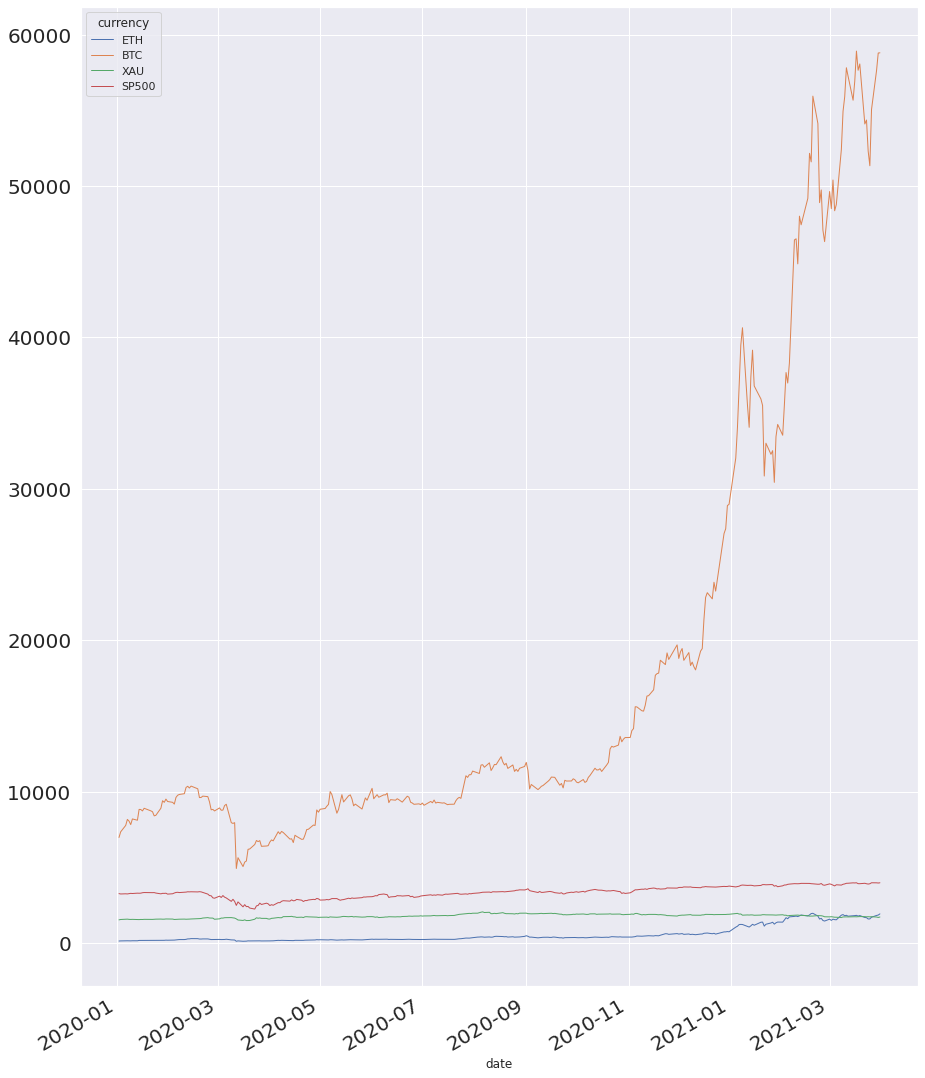

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.984837,0.186960,0.792660
BTC,0.984837,1.000000,0.128293,0.782454
XAU,0.186960,0.128293,1.000000,0.439439
SP500,0.792660,0.782454,0.439439,1.000000


In [8]:
#hide ### Koreliacijos matrica.

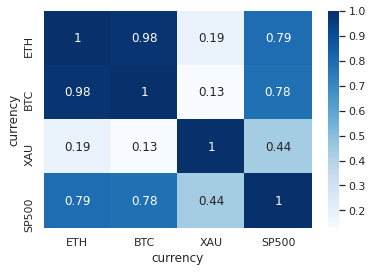

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')